# Dimensionality Reduction

In this chapter we introduce methods to reduce datasets of high dimension to a lower number of dimensions while preserving important structures.

![](https://bigsnarf.files.wordpress.com/2013/06/screen-shot-2013-06-14-at-11-16-30-am.png)
[_Source_](https://bigsnarf.wordpress.com/2013/06/14/curse-of-dimensionality/)

Sometimes, more isn't better. Why would we want to reduce the number of features in our data? **Issues with high dimensionality** include:

1. the [**curse of dimensionality**](https://en.m.wikipedia.org/wiki/Curse_of_dimensionality) - as the volume of the data space increases with the number of dimensions, all data tends to become sparse, making it difficult to find structure
    - an example: many clustering techniques rely on a distance metric between data points (e.g. Euclidean distance), but as the dimensionality increases, [_all points tend to become uniformly distant from each other_](https://stats.stackexchange.com/questions/99171/why-is-euclidean-distance-not-a-good-metric-in-high-dimensions) 
1. processsing large amounts of data (e.g. fitting a model with ML to the data) comes at **computational cost** - it may be too high to be viable
1. a related point: the more dimensions the data has, the **more training examples** are needed to estimate a robust model, further increasing the computational cost 


Apart from potentially solving these issues, dimensionality reduction techniques can provide:

1. more **interpretable results**, because they extract information and remove noise
1. more **visualization options**, e.g. by reducing to 2 or 3 dimensions

## Preamble

In [1]:
import matplotlib.pyplot as plt
import seaborn
import numpy
import pandas
import sklearn

In [2]:
import data_science_learning_paths
data_science_learning_paths.setup_plot_style(dark=True)

## Example Datasets

In the following we are going to apply dimensionality reduction techniques to some real-world datasets. We have chosen a few with a high number of dimensions.

### House Prices

In [3]:
houses_dataset = data_science_learning_paths.datasets.read_house_prices(
    encode_categorial=True,
    encode_ordinal=True
)

In [4]:
houses_data = houses_dataset[houses_dataset.columns.difference(["SalePrice"])]
houses_labels = houses_dataset["SalePrice"]


In [5]:
houses_data.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond,BsmtFinSF1,...,MSSubClass,MiscVal,OverallCond,OverallQual,PoolArea,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,3,1,0,0,0,0,3,706,...,60,0,5,7,0,8,856,2003,2003,2008
1,1262,0,3,1,0,0,0,0,3,978,...,20,0,8,6,0,6,1262,1976,1976,2007
2,920,866,3,1,0,0,0,0,3,486,...,60,0,5,7,0,6,920,2001,2002,2008
3,961,756,3,1,0,0,0,0,2,216,...,70,0,5,7,0,7,756,1915,1970,2006
4,1145,1053,4,1,0,0,0,0,3,655,...,60,0,5,8,0,9,1145,2000,2000,2008


In [6]:
houses_data.columns

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BldgType_1Fam',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir_N',
       'CentralAir_Y', 'EnclosedPorch', 'ExterCond', 'ExterQual',
       'FireplaceQu', 'Fireplaces', 'Foundation_BrkTil', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'FullBath', 'Functional_Maj1', 'Functional_Maj2',
       'Functional_Min1', 'Functional_Min2', 'Functional_Mod',
       'Functional_Sev', 'Functional_Typ', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageQual', 'GrLivArea', 'HalfBath', 'HeatingQC',
       'Heating_Floor', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav',
       'Heating_OthW', 'Heating_Wall', 'HouseStyle_1.5Fin',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'Hou

### Handwritten Digits

This is a set of handwritten digits encoded as grayscale images. 

In [7]:
from sklearn import datasets


In [8]:
digits_dataset = datasets.load_digits()

In [9]:
digits_labels = digits_dataset["target"]

In [10]:
digits_images = digits_dataset["images"]

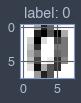

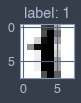

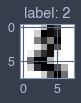

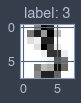

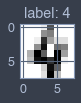

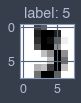

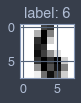

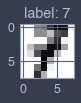

In [11]:
for i in range(8):
    plt.figure(figsize=(1,1))
    plt.imshow(digits_images[i], cmap="binary")
    plt.title(f"label: {digits_labels[i]}")

In [12]:
digits_images.shape

(1797, 8, 8)

We treat each of the 64 pixel as one dimension of the dataset, and therefore flatten the images:

In [13]:
digits_data = digits_images.reshape(-1, 8*8)

In [14]:
digits_data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

## Principal Component Analysis

![](http://4.bp.blogspot.com/-pleL0HvLUgU/UYqpNFdd8EI/AAAAAAAAAHA/uf11u9lcq5g/s1600/PCA_1.png)
_[Source](http://mengnote.blogspot.com/2013/05/an-intuitive-explanation-of-pca.html)_

The core idea of **Principal Component Analysis** is to transform the data to a new coordinate system with lower dimension $p$ (i.e. a reduced set of features). The $p$ axes of this new coordinate system are called the **principal components**. These axes are _orthogonal_ or _linearly uncorrelated_ and they are ordered by the _variance_ of our data along these axes. For example, the data has most variance along $C_1$, second most variance along $C_2$, etc.

One can also think about PCA as an algorithm that tries to fit a $p$-dimensional _ellipsoid_ to the shape of the data - the $p$ components fully describe the ellipsoid.

So by extracting the first few principal components and using them as the new coordinate system into which to place the data points, we achieve a reduced description of the data that nonetheless captures its structure. 

Not surprisingly, `scikit-learn` has an implementation of PCA as an unsupervised estimator:

In [15]:
from sklearn.decomposition import PCA

### ... on Digits

In [16]:
digits_pca_raw = PCA(n_components=2).fit_transform(X=digits_data)

In [17]:
digits_pca = pandas.DataFrame(
        {
            "x": digits_pca_raw[:,0],
            "y": digits_pca_raw[:,1],
            "digit": digits_labels
        }
    )

<AxesSubplot:xlabel='x', ylabel='y'>

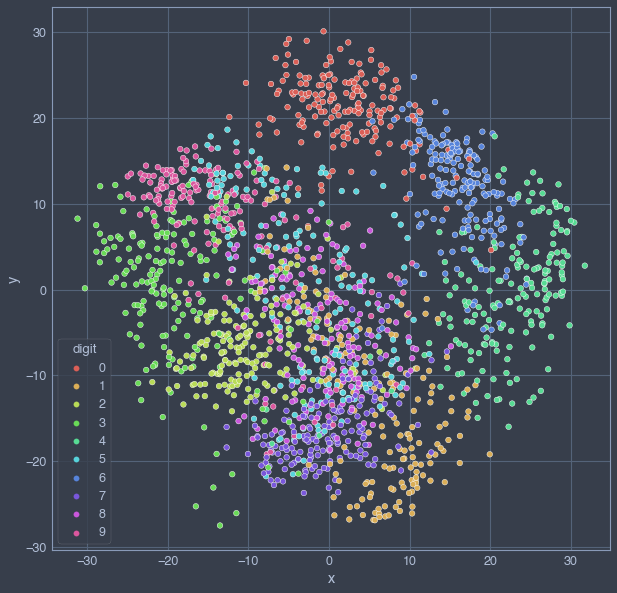

In [18]:
plt.figure(figsize=(10,10))
seaborn.scatterplot(
    data=digits_pca,
    x="x",
    y="y",
    hue="digit",
    palette=seaborn.color_palette("hls", 10),
)

### ... on Houses

In [19]:
houses_pca_raw = PCA(n_components=2).fit_transform(houses_data)

In [20]:
houses_pca = pandas.DataFrame(
        {
            "x": houses_pca_raw[:,0],
            "y": houses_pca_raw[:,1],
            "price": houses_labels,
        }
    )

<AxesSubplot:xlabel='x', ylabel='y'>

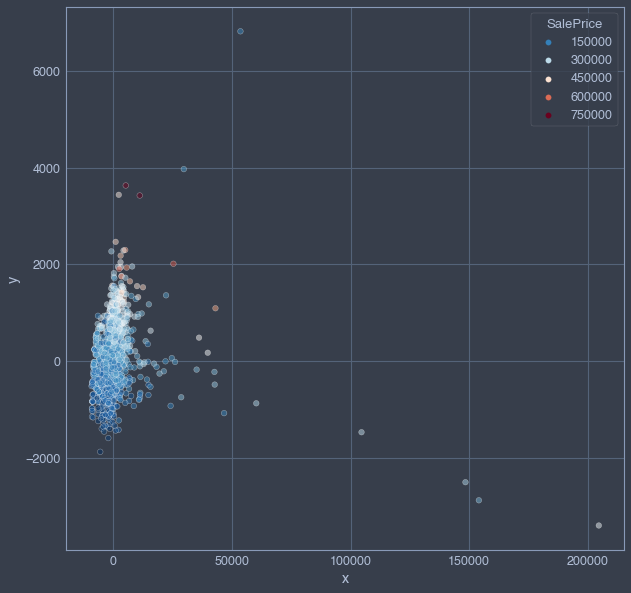

In [21]:
plt.figure(figsize=(10,10))
seaborn.scatterplot(
    data=houses_pca,
    x="x",
    y="y",
    hue=houses_labels,
    palette="RdBu_r",
    alpha=0.5
)

### Exercise: Interpret

**Discuss the plots and try to interpret the results!**

## $t$-SNE

**$t$-Distributed Stochastic Neighbor Embedding (t-SNE)** is a more recent dimensionality reduction technique. Roughly described, the $t$-SNE algorithm tries to **embed** the original data points into a lower-dimensional space *so that distances between data points are preserved*.


Unlike PCA, $t$-SNE can also capture non-linear relationships in the data. In turn, the algorithm is computationally more costly.

In [22]:
from sklearn.manifold import TSNE

### ... on Digits

In [23]:
digits_tsne = TSNE(n_components=2).fit_transform(X=digits_data)

In [24]:
digits_reduced = pandas.DataFrame(
        {
            "x": digits_tsne[:,0],
            "y": digits_tsne[:,1],
            "digit": digits_labels
        }
    )

<AxesSubplot:xlabel='x', ylabel='y'>

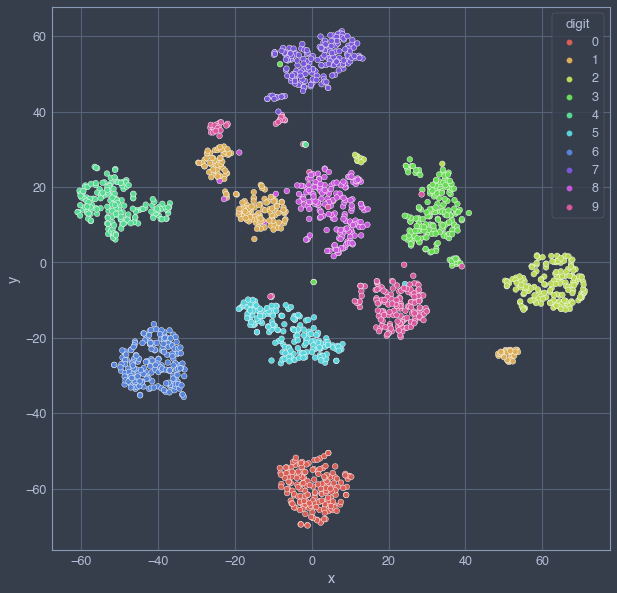

In [25]:
plt.figure(figsize=(10,10))
seaborn.scatterplot(
    data=digits_reduced,
    x="x",
    y="y",
    hue="digit",
    palette=seaborn.color_palette("hls", 10),
)

### ... on Houses

In [26]:
%time houses_tsne = TSNE(n_components=2).fit_transform(X=houses_data)

CPU times: user 19.1 s, sys: 6.52 s, total: 25.7 s
Wall time: 3.7 s


In [27]:
houses_reduced = pandas.DataFrame(
        {
            "x": houses_tsne[:,0],
            "y": houses_tsne[:,1],
            "price": houses_labels,
        }
    )

/Users/cls/miniforge3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

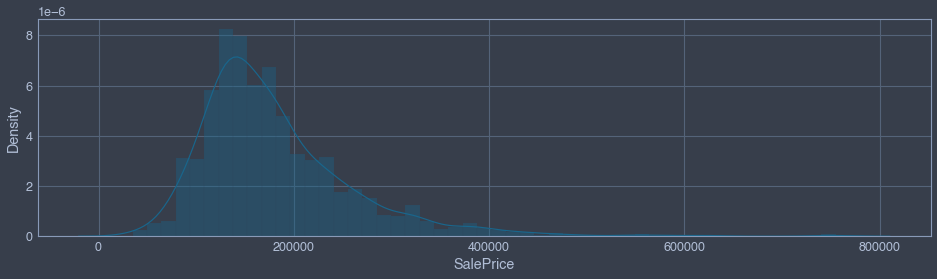

In [28]:
seaborn.histplot(houses_labels, kde=True)


<AxesSubplot:xlabel='x', ylabel='y'>

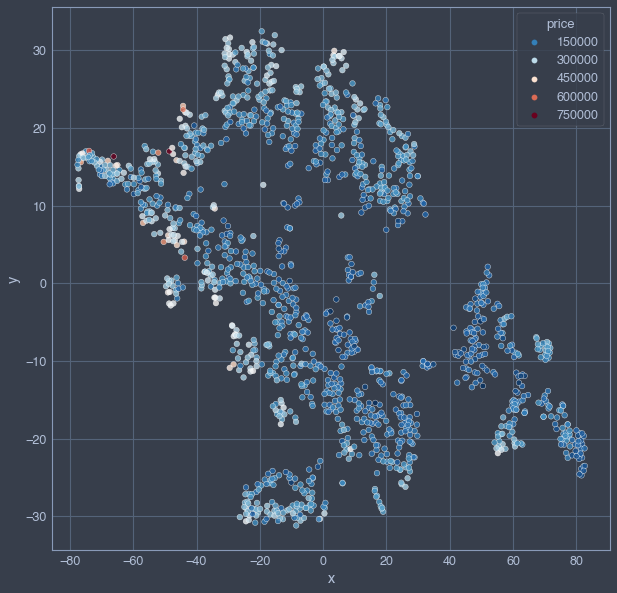

In [29]:
plt.figure(figsize=(10,10))
seaborn.scatterplot(
    data=houses_reduced,
    x="x",
    y="y",
    hue="price",
    palette="RdBu_r",
    alpha=0.8
)

<AxesSubplot:xlabel='x', ylabel='y'>

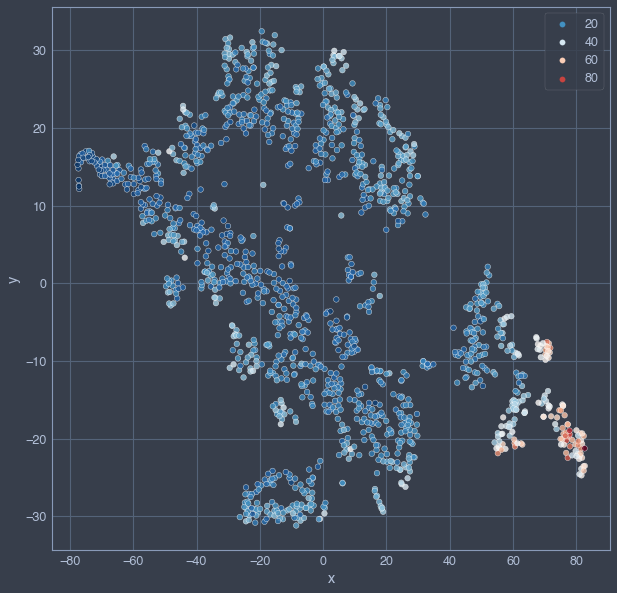

In [30]:
plt.figure(figsize=(10,10))
seaborn.scatterplot(
    data=houses_reduced,
    x="x",
    y="y",
    hue=houses_labels / houses_data["LotArea"],
    palette="RdBu_r",
    alpha=0.8
)

<AxesSubplot:xlabel='x', ylabel='y'>

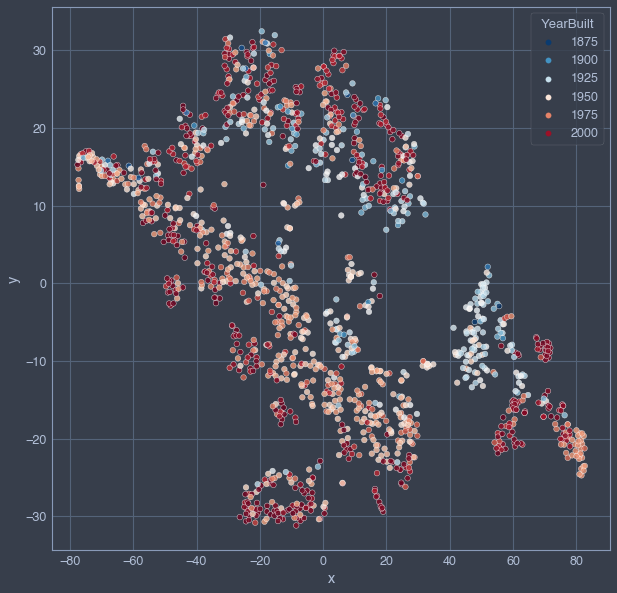

In [31]:
plt.figure(figsize=(10,10))
seaborn.scatterplot(
    data=houses_reduced,
    x="x",
    y="y",
    hue=houses_data["YearBuilt"],
    palette="RdBu_r",
    alpha=0.8
)

## Open Exercise: Train a Model on the Reduced Feature Space

**Use machine learning to train a classifier or regressor on the example datasets. Compare the performance of a model trained on the original data with the performance using reduced feature sets!**

## References

- [towardsdatascience.com: Dimensionality Reduction](https://towardsdatascience.com/dimensionality-reduction-pca-ica-and-manifold-learning-65393010253e)
- [An intuitive explanation of PCA](http://mengnote.blogspot.com/2013/05/an-intuitive-explanation-of-pca.html)
- [Introduction to t-SNE](https://www.datacamp.com/community/tutorials/introduction-t-sne)

---
_This notebook is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/). Copyright © 2018-2025 [Point 8 GmbH](https://point-8.de)_